# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

## Dataset yang digunakan : The AI, ML, Data Science Salary (2020- 2025)

**This Dataset containes the details of the AI, ML, Data Science Salary (2020- 2025).**
Salary data is in USD and recalculated at its average fx rate during the year for salaries entered in other currencies.

The data is processed and updated on a weekly basis so the rankings may change over time during the year.

Attribute Information

- work_year: The year the salary was paid.
- experience_level: The experience level in the job during the year with the following possible values:
   EN Entry-level / Junior
   MI Mid-level / Intermediate
   SE Senior-level / Expert
   EX Executive-level / Director
- employment_type: The type of employement for the role:
  PT Part-time
  FT Full-time
  CT Contract
  FL Freelance
- job_title: The role worked in during the year.
- salary: The total gross salary amount paid.
- salary_currency: The currency of the salary paid as an ISO 4217 currency code.
- salary_in_usd: The salary in USD (FX rate divided by avg. USD rate of respective year) via statistical data from the BIS and central banks.
- employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- remote_ratio : The overall amount of work done remotely, possible values are as follows:
  0 No remote work (less than 20%)
  50 Partially remote/hybird
  100 Fully remote (more than 80%)
- company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.
- company_size: The average number of people that worked for the company during the year:
  S less than 50 employees (small)
  M 50 to 250 employees (medium)
  L more than 250 employees (large)


Acknowledgements

https://aijobs.net/

Photo by Anastassia Anufrieva on Unsplash

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

### Menggunakan kaggle

In [44]:
path = kagglehub.dataset_download("samithsachidanandan/the-global-ai-ml-data-science-salary-for-2025")
print("Path to dataset files:", path)
df = pd.read_csv(path + '/salaries.csv')

Path to dataset files: C:\Users\alfth\.cache\kagglehub\datasets\samithsachidanandan\the-global-ai-ml-data-science-salary-for-2025\versions\1


### Load dari lokal

In [45]:
df = pd.read_csv('dataset_inisiasi.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

#### Assesing data

In [46]:
df.head()

work_year experience_level employment_type                 job_title  \
0       2025               MI              FT  Customer Success Manager   
1       2025               SE              FT                  Engineer   
2       2025               SE              FT                  Engineer   
3       2025               SE              FT         Applied Scientist   
4       2025               SE              FT         Applied Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   57000             EUR          60000                 NL            50   
1  165000             USD         165000                 US             0   
2  109000             USD         109000                 US             0   
3  294000             USD         294000                 US             0   
4  137600             USD         137600                 US             0   

  company_location company_size  
0               NL            L  
1               US            M  
2               US            M  
3               US            M  
4               US            M

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary              88584 non-null  int64 
 5   salary_currency     88584 non-null  object
 6   salary_in_usd       88584 non-null  int64 
 7   employee_residence  88584 non-null  object
 8   remote_ratio        88584 non-null  int64 
 9   company_location    88584 non-null  object
 10  company_size        88584 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.4+ MB


In [48]:
df.describe(include='all')

work_year experience_level employment_type       job_title  \
count   88584.000000            88584           88584           88584   
unique           NaN                4               4             312   
top              NaN               SE              FT  Data Scientist   
freq             NaN            51596           88111           13156   
mean     2024.034758              NaN             NaN             NaN   
std         0.620370              NaN             NaN             NaN   
min      2020.000000              NaN             NaN             NaN   
25%      2024.000000              NaN             NaN             NaN   
50%      2024.000000              NaN             NaN             NaN   
75%      2024.000000              NaN             NaN             NaN   
max      2025.000000              NaN             NaN             NaN   

              salary salary_currency  salary_in_usd employee_residence  \
count   8.858400e+04           88584   88584.000000              88584   
unique           NaN              26            NaN                 96   
top              NaN             USD            NaN                 US   
freq             NaN           83994            NaN              79705   
mean    1.619323e+05             NaN  157567.798417                NaN   
std     1.965317e+05             NaN   73531.373158                NaN   
min     1.400000e+04             NaN   15000.000000                NaN   
25%     1.060000e+05             NaN  106097.250000                NaN   
50%     1.470000e+05             NaN  146307.000000                NaN   
75%     1.995000e+05             NaN  198600.000000                NaN   
max     3.040000e+07             NaN  800000.000000                NaN   

        remote_ratio company_location company_size  
count   88584.000000            88584        88584  
unique           NaN               90            3  
top              NaN               US            M  
freq             NaN            79762        85667  
mean       21.286011              NaN          NaN  
std        40.831018              NaN          NaN  
min         0.000000              NaN          NaN  
25%         0.000000              NaN          NaN  
50%         0.000000              NaN          NaN  
75%         0.000000              NaN          NaN  
max       100.000000              NaN          NaN

Check Missing Value

In [49]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

##### Analisis Distribusi, korelasi dan visualisasi data

fitur numerik

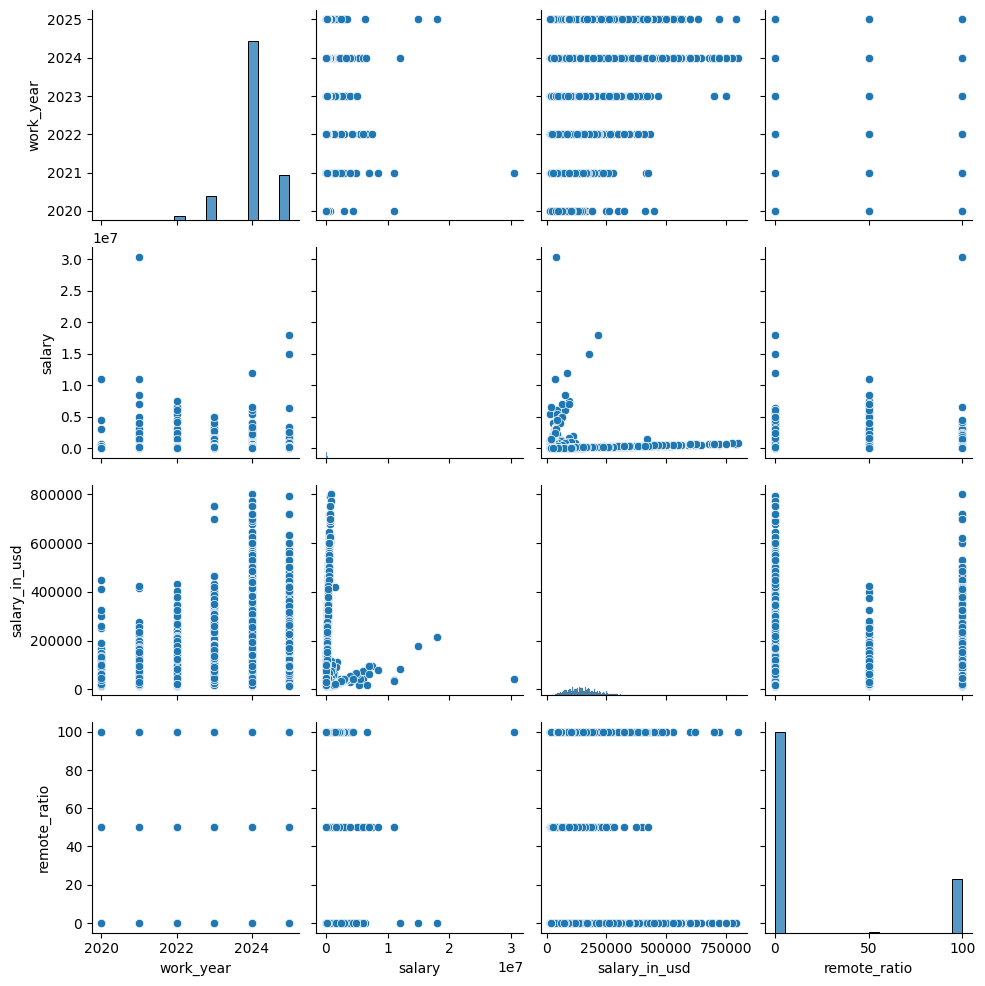

In [50]:
sns.pairplot(df)

In [51]:
df.hist(figsize=(10, 10))

array([[<Axes: title={'center': 'work_year'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'salary_in_usd'}>,
        <Axes: title={'center': 'remote_ratio'}>]], dtype=object)

Fitur Kategori

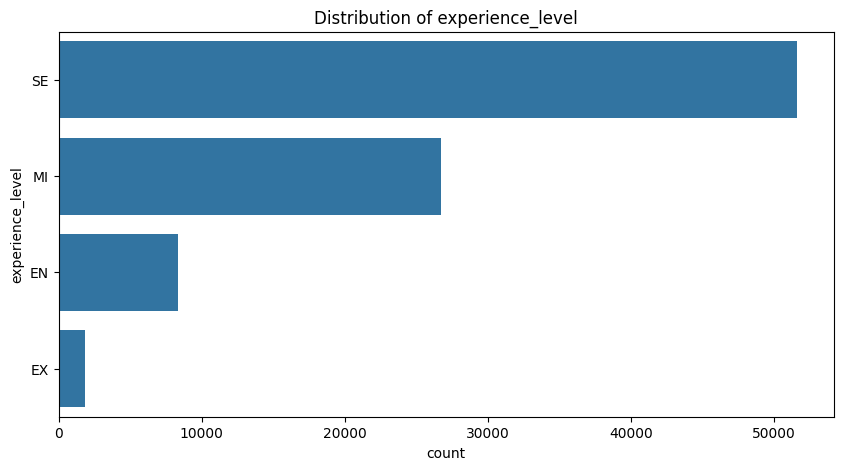

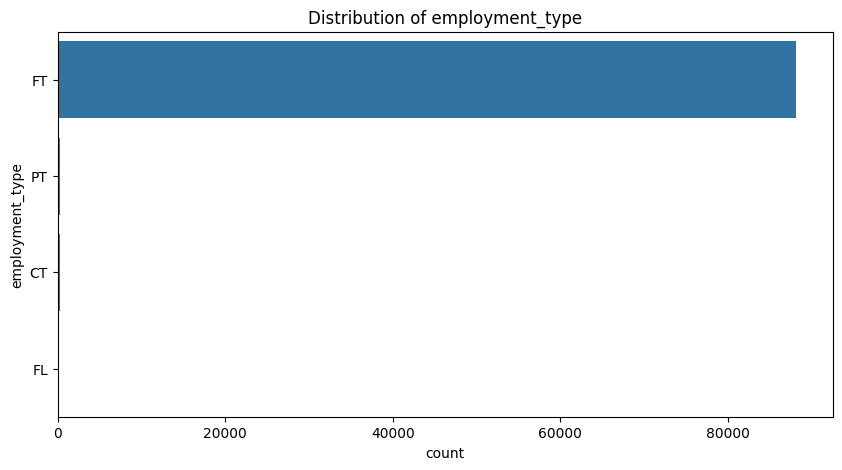

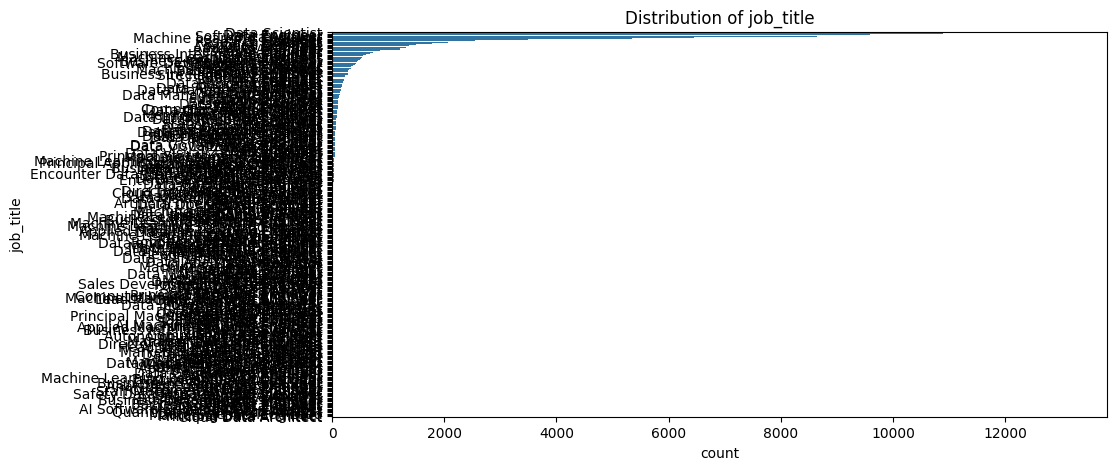

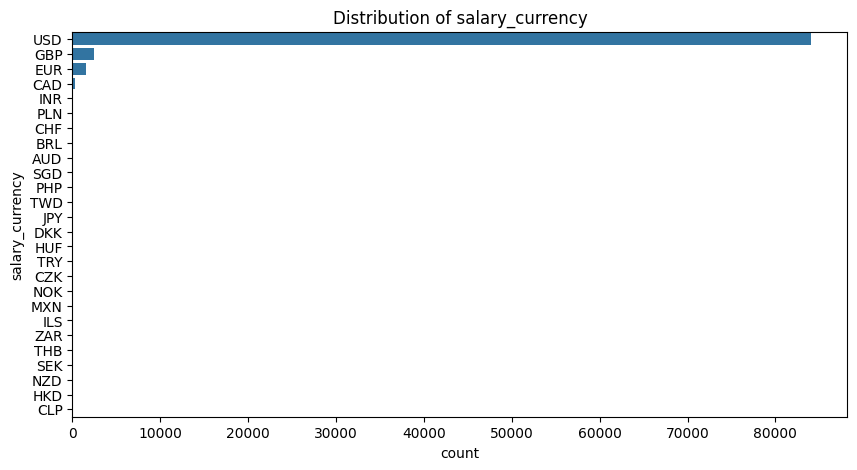

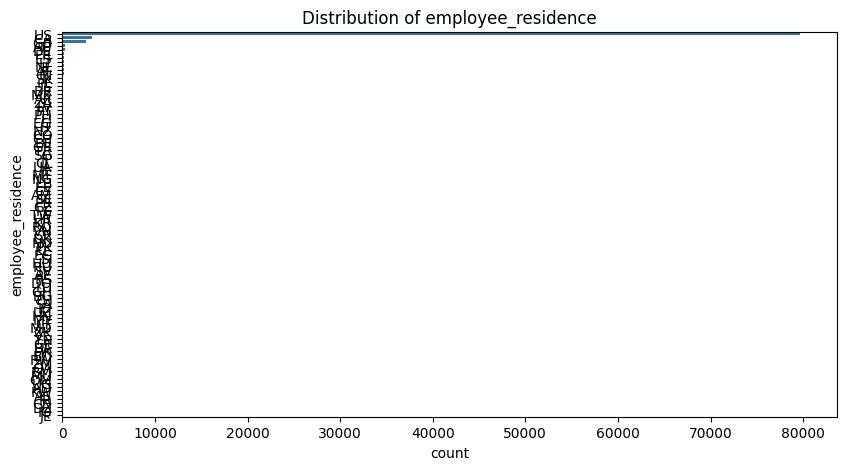

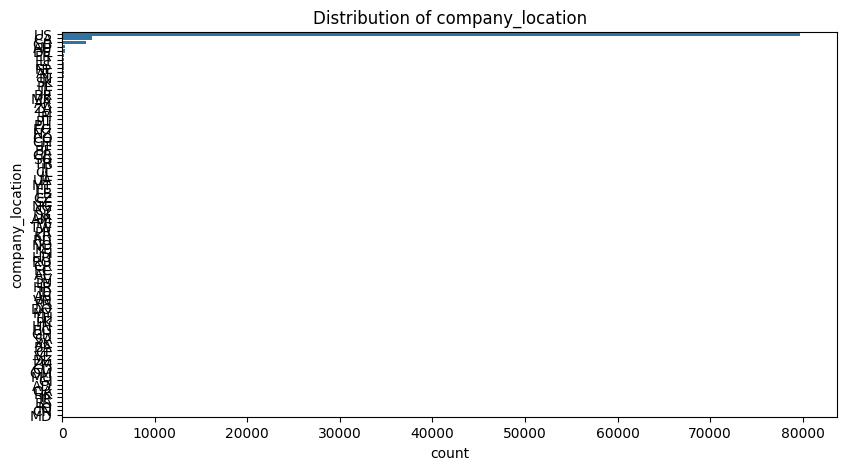

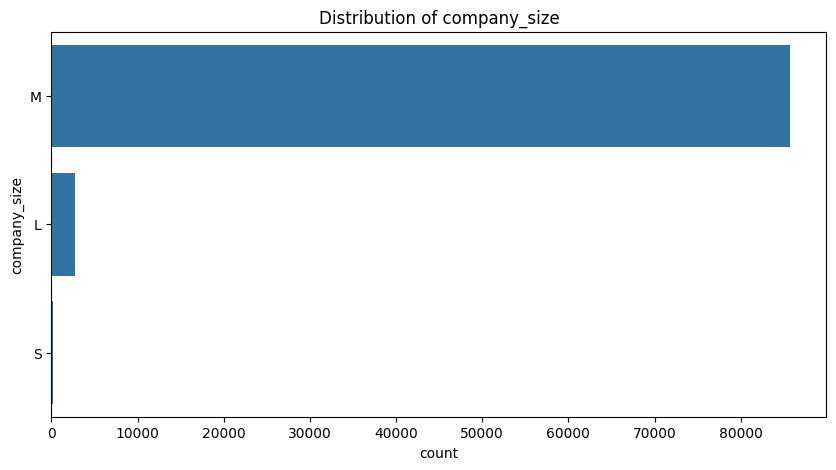

In [52]:
category = df.select_dtypes(include='object')
for col in category.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=category, order=category[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

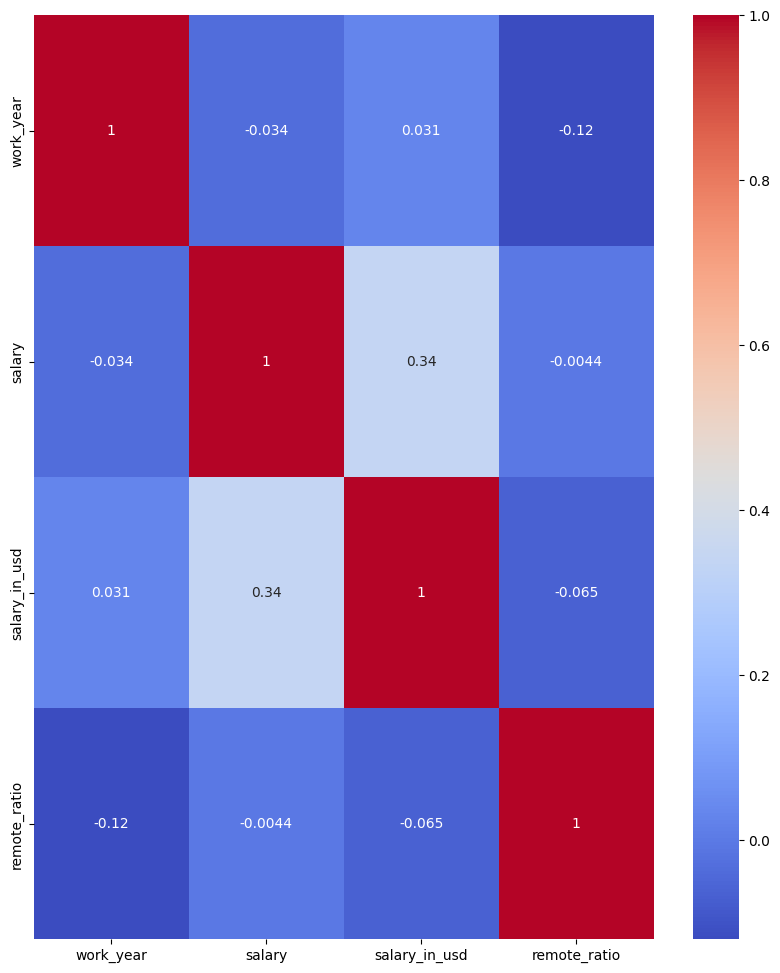

In [53]:
plt.figure(figsize=(10,12))
numerical = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numerical.corr(), annot=True, cmap='coolwarm')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

check data duplikat

In [54]:
df.duplicated().sum()

np.int64(44340)

###### check outlier

In [55]:

def check_outlier(df):
    print('Outlier / jumlah data\n')
    for i in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        print(f'Outlier {i} : {round(df[(df[i] < lower) | (df[i] > upper)].shape[0] / df.shape[0] * 100,2)}%')

check_outlier(df)

Outlier / jumlah data

Outlier work_year : 29.75%
Outlier salary : 1.98%
Outlier salary_in_usd : 1.98%
Outlier remote_ratio : 21.45%


In [56]:
def cap_outliers(df, cols):
    for i in cols :
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[i] = np.where(df[i] < lower_bound, lower_bound, df[i])
        df[i] = np.where(df[i] > upper_bound, upper_bound, df[i])
    return df

cap_outliers(df, ['salary', 'salary_in_usd'])

work_year experience_level employment_type                 job_title  \
0           2025               MI              FT  Customer Success Manager   
1           2025               SE              FT                  Engineer   
2           2025               SE              FT                  Engineer   
3           2025               SE              FT         Applied Scientist   
4           2025               SE              FT         Applied Scientist   
...          ...              ...             ...                       ...   
88579       2020               SE              FT            Data Scientist   
88580       2021               MI              FT  Principal Data Scientist   
88581       2020               EN              FT            Data Scientist   
88582       2020               EN              CT     Business Data Analyst   
88583       2021               SE              FT            Data Scientist   

         salary salary_currency  salary_in_usd employee_residence  \
0       57000.0             EUR      60000.000                 NL   
1      165000.0             USD     165000.000                 US   
2      109000.0             USD     109000.000                 US   
3      294000.0             USD     294000.000                 US   
4      137600.0             USD     137600.000                 US   
...         ...             ...            ...                ...   
88579  339750.0             USD     337354.125                 US   
88580  151000.0             USD     151000.000                 US   
88581  105000.0             USD     105000.000                 US   
88582  100000.0             USD     100000.000                 US   
88583  339750.0             INR      94665.000                 IN   

       remote_ratio company_location company_size  
0                50               NL            L  
1                 0               US            M  
2                 0               US            M  
3                 0               US            M  
4                 0               US            M  
...             ...              ...          ...  
88579           100               US            L  
88580           100               US            L  
88581           100               US            S  
88582           100               US            L  
88583            50               IN            L  

[88584 rows x 11 columns]

In [57]:

def check_outlier(df):
    print('Outlier / jumlah data\n')
    for i in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        print(f'Outlier {i} : {round(df[(df[i] < lower) | (df[i] > upper)].shape[0] / df.shape[0] * 100,2)}%')

check_outlier(df)

Outlier / jumlah data

Outlier work_year : 29.75%
Outlier salary : 0.0%
Outlier salary_in_usd : 0.0%
Outlier remote_ratio : 21.45%


remote ratio tidak dihilangkan karena tidak cocok dihitung dengan IQR(melihat dari distribusi data)

##### Encoding data kategori

pengecekan jumlah unique value di tiap fitur kategori

In [58]:
categorical_feature = df.select_dtypes(include=['object','category'])
high_cardinal_column = []
low_cardinal_column = []
for col in categorical_feature.columns:
    print(f'unique value {col} : {categorical_feature[col].nunique()}')
    if categorical_feature[col].nunique() > 10:
        high_cardinal_column.append(col)
    else:
        low_cardinal_column.append(col)

unique value experience_level : 4


unique value employment_type : 4
unique value job_title : 312
unique value salary_currency : 26
unique value employee_residence : 96
unique value company_location : 90
unique value company_size : 3


memisahkan fitur high cardinality dan low cardinality

In [59]:
low_cardinal_feature = categorical_feature[low_cardinal_column]
high_cardinal_feature = categorical_feature[high_cardinal_column]

print(low_cardinal_feature.shape)
print(high_cardinal_feature.shape)

(88584, 3)
(88584, 4)


menggunakan dummy encoding untuk low cardinal feature tipe nominal

In [60]:
nominal_category = pd.get_dummies(low_cardinal_feature['employment_type'],drop_first=True)
nominal_category

FL     FT     PT
0      False   True  False
1      False   True  False
2      False   True  False
3      False   True  False
4      False   True  False
...      ...    ...    ...
88579  False   True  False
88580  False   True  False
88581  False   True  False
88582  False  False  False
88583  False   True  False

[88584 rows x 3 columns]

menggunakan frequency encoding untuk job title

In [61]:
column = ['job_title','company_location','employee_residence','salary_currency']
for col in column:
    freq = high_cardinal_feature[col].value_counts()
    high_cardinal_feature.loc[:, col] = high_cardinal_feature[col].map(freq)

menggunakan label encoding untuk ordinal category

In [62]:
exp_lv_map = {
    'EN': 1,
    'MI': 2,
    'SE': 3,
    'EX': 4
}

comp_size_map = {
    'S': 1,
    'M': 2,
    'L': 3
}



low_cardinal_feature.loc[:, 'experience_level'] = low_cardinal_feature['experience_level'].map(exp_lv_map)
low_cardinal_feature.loc[:, 'company_size'] = low_cardinal_feature['company_size'].map(comp_size_map)


In [63]:
low_cardinal_feature.drop(['employment_type'], axis=1, inplace=True)
low_cardinal_feature = pd.concat([low_cardinal_feature, nominal_category], axis=1)

C:\Users\alfth\AppData\Local\Temp\ipykernel_16784\1001176302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_cardinal_feature.drop(['employment_type'], axis=1, inplace=True)


menggabungkan kembali dengan numeric feature

In [64]:
numerical_feature = df.select_dtypes(include=['int64', 'float64'])
df_encoded = pd.concat([numerical_feature,low_cardinal_feature,high_cardinal_feature], axis=1)
df_encoded

work_year    salary  salary_in_usd  remote_ratio experience_level  \
0           2025   57000.0      60000.000            50                2   
1           2025  165000.0     165000.000             0                3   
2           2025  109000.0     109000.000             0                3   
3           2025  294000.0     294000.000             0                3   
4           2025  137600.0     137600.000             0                3   
...          ...       ...            ...           ...              ...   
88579       2020  339750.0     337354.125           100                3   
88580       2021  151000.0     151000.000           100                2   
88581       2020  105000.0     105000.000           100                1   
88582       2020  100000.0     100000.000           100                1   
88583       2021  339750.0      94665.000            50                3   

      company_size     FL     FT     PT job_title salary_currency  \
0                3  False   True  False         1            1559   
1                2  False   True  False      5344           83994   
2                2  False   True  False      5344           83994   
3                2  False   True  False      1778           83994   
4                2  False   True  False      1778           83994   
...            ...    ...    ...    ...       ...             ...   
88579            3  False   True  False     13156           83994   
88580            3  False   True  False        10           83994   
88581            1  False   True  False     13156           83994   
88582            3  False  False  False        21           83994   
88583            3  False   True  False     13156              80   

      employee_residence company_location  
0                    187              187  
1                  79705            79762  
2                  79705            79762  
3                  79705            79762  
4                  79705            79762  
...                  ...              ...  
88579              79705            79762  
88580              79705            79762  
88581              79705            79762  
88582              79705            79762  
88583                155              134  

[88584 rows x 13 columns]

sisa fitur tidak digunakan karena membuat curse of dimensionality dalam clustering (hasil trial & error)

##### Scaling Feature

In [65]:

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)
df_scaled

work_year    salary  salary_in_usd  remote_ratio  experience_level  \
0            1.0  0.132003       0.139598           0.5          0.333333   
1            1.0  0.463546       0.465327           0.0          0.666667   
2            1.0  0.291635       0.291605           0.0          0.666667   
3            1.0  0.859555       0.865508           0.0          0.666667   
4            1.0  0.379432       0.380327           0.0          0.666667   
...          ...       ...            ...           ...               ...   
88579        0.0  1.000000       1.000000           1.0          0.666667   
88580        0.2  0.420568       0.421896           1.0          0.333333   
88581        0.0  0.279355       0.279196           1.0          0.000000   
88582        0.0  0.264006       0.263685           1.0          0.000000   
88583        0.2  1.000000       0.247135           0.5          0.666667   

       company_size   FL   FT   PT  job_title  salary_currency  \
0               1.0  0.0  1.0  0.0   0.000000         0.018549   
1               0.5  0.0  1.0  0.0   0.406157         1.000000   
2               0.5  0.0  1.0  0.0   0.406157         1.000000   
3               0.5  0.0  1.0  0.0   0.135082         1.000000   
4               0.5  0.0  1.0  0.0   0.135082         1.000000   
...             ...  ...  ...  ...        ...              ...   
88579           1.0  0.0  1.0  0.0   1.000000         1.000000   
88580           1.0  0.0  1.0  0.0   0.000684         1.000000   
88581           0.0  0.0  1.0  0.0   1.000000         1.000000   
88582           1.0  0.0  0.0  0.0   0.001520         1.000000   
88583           1.0  0.0  1.0  0.0   1.000000         0.000941   

       employee_residence  company_location  
0                0.002334          0.002332  
1                1.000000          1.000000  
2                1.000000          1.000000  
3                1.000000          1.000000  
4                1.000000          1.000000  
...                   ...               ...  
88579            1.000000          1.000000  
88580            1.000000          1.000000  
88581            1.000000          1.000000  
88582            1.000000          1.000000  
88583            0.001932          0.001667  

[88584 rows x 13 columns]

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [66]:
# kmeans clustering
n = 4
kmeans = KMeans(n_clusters=n, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df_clustered = df_scaled.copy()
df_clustered['Cluster'] = clusters

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

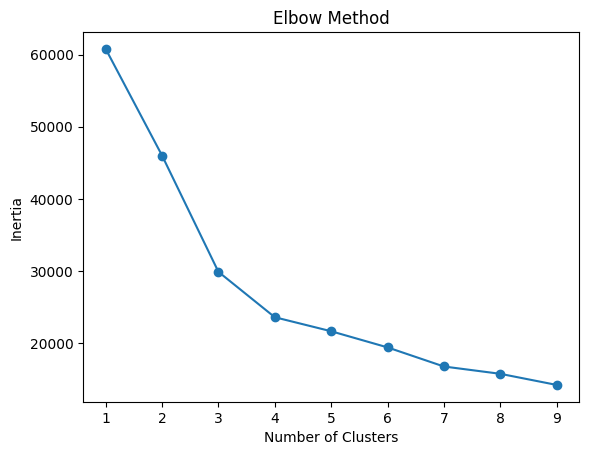

In [67]:

inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()




In [68]:

silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
print("For n_clusters =", n,
      "The average silhouette_score is :", silhouette_avg)


For n_clusters = 4 The average silhouette_score is : 0.3189723086661509


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

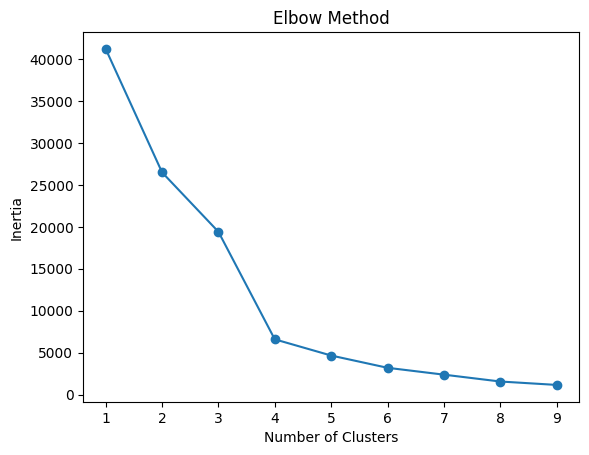

In [69]:

selector = VarianceThreshold(threshold=0.06)
df_selected = selector.fit_transform(df_scaled)

inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled[df_scaled.columns[selector.get_support()]])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()



In [70]:
column_selected = df_scaled.columns[selector.get_support()]
print(column_selected)

Index(['remote_ratio', 'job_title', 'employee_residence', 'company_location'], dtype='object')


In [71]:
silhouette_avg_selection = silhouette_score(df_scaled[column_selected], kmeans.labels_)
print("For n_clusters =", n,
      "The average silhouette_score is :", silhouette_avg_selection)

For n_clusters = 4 The average silhouette_score is : 0.7333740587227026


perbedaan silhouette sebelum dan sesudah feature selection

In [72]:

print("Sebelum feature selection", silhouette_avg)
print("Setelah feature selection", silhouette_avg_selection)

Sebelum feature selection 0.3189723086661509
Setelah feature selection 0.7333740587227026


Terlihat hasil cluster mengalami peningkatan yang signifikan setelah melakukan feature selection

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

C:\Users\alfth\AppData\Local\Temp\ipykernel_16784\1317042358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = clusters


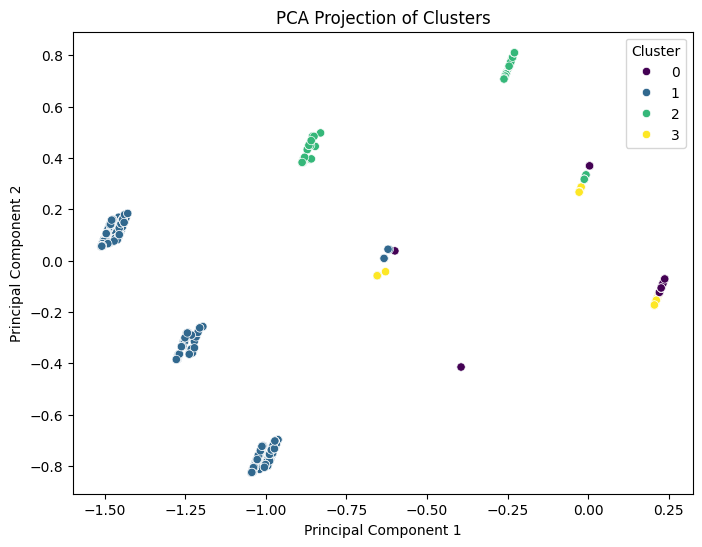

In [73]:


df_selected = df_scaled[column_selected]
df_selected['Cluster'] = clusters

pca = PCA(n_components=2)

pca_result = pca.fit_transform(df_selected.drop('Cluster', axis=1))

df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_selected['Cluster']


plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('PCA Projection of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


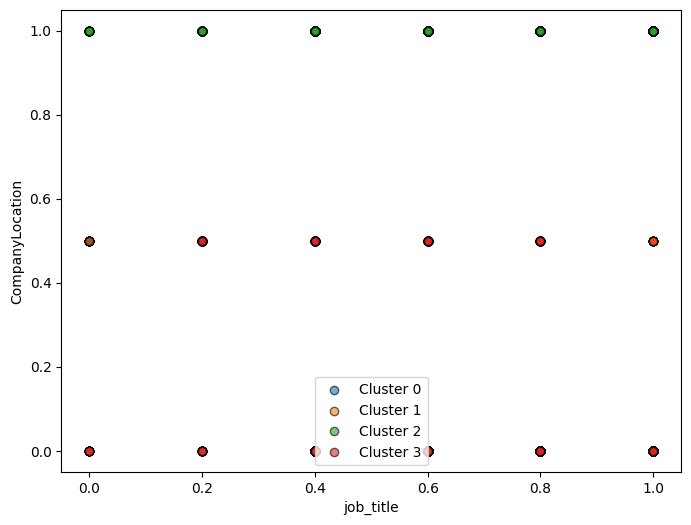

In [74]:

plt.figure(figsize=(8, 6))

unique_labels = np.unique(clusters)
for label in unique_labels:
    mask = clusters == label
    plt.scatter(
        df_clustered.loc[mask, df_clustered.columns[0]],  # Kolom pertama
        df_clustered.loc[mask, df_clustered.columns[3]],  # Kolom kedua
        label=f"Cluster {label}",
        alpha=0.6,
        edgecolors="k"
    )

plt.xlabel("job_title")
plt.ylabel("CompanyLocation")
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Dalam proses ini saya tidak melakukan inverse transform untuk proses normalisasi dan encoding, karena saya menyimpan dataset sebelum preprocessing itu

In [75]:
df_original_clustered = df.copy()
df_original_clustered = df_original_clustered[column_selected]
df_original_clustered['Cluster'] = df_clustered['Cluster']
df_original_clustered

remote_ratio                 job_title employee_residence  \
0                50  Customer Success Manager                 NL   
1                 0                  Engineer                 US   
2                 0                  Engineer                 US   
3                 0         Applied Scientist                 US   
4                 0         Applied Scientist                 US   
...             ...                       ...                ...   
88579           100            Data Scientist                 US   
88580           100  Principal Data Scientist                 US   
88581           100            Data Scientist                 US   
88582           100     Business Data Analyst                 US   
88583            50            Data Scientist                 IN   

      company_location  Cluster  
0                   NL        1  
1                   US        3  
2                   US        3  
3                   US        3  
4                   US        3  
...                ...      ...  
88579               US        2  
88580               US        2  
88581               US        2  
88582               US        2  
88583               IN        1  

[88584 rows x 5 columns]

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

#### Analisis Kluster

In [76]:
df_summary = df_original_clustered.groupby('Cluster').agg({
    'remote_ratio': ['mean', 'min', 'max'],
    'company_location': [('mode', lambda x: x.mode().iloc[0]),
                         ('count', lambda x: (x == x.mode().iloc[0]).sum())],
    'employee_residence': [('mode', lambda x: x.mode().iloc[0]),
                            ('count', lambda x: (x == x.mode().iloc[0]).sum())],
    'job_title': [('mode', lambda x: x.mode().iloc[0]),
                  ('count', lambda x: (x == x.mode().iloc[0]).sum())],
})


# Tambahkan distribusi jumlah sampel per cluster
cluster_distribution = df_original_clustered['Cluster'].value_counts().rename("count").sort_index()

# Gabungkan ke summary
df_summary['Cluster Size'] = cluster_distribution

df_summary


remote_ratio          company_location        employee_residence  \
                mean min  max             mode  count               mode   
Cluster                                                                    
0           0.018979   0   50               US  34248                 US   
1          23.358243   0  100               CA   3202                 CA   
2          99.973178  50  100               US  16773                 US   
3           0.048736   0   50               US  28726                 US   

                     job_title       Cluster Size  
         count            mode count               
Cluster                                            
0        34248  Data Scientist  9002        34249  
1         3199    Data Analyst  1243         8832  
2        16732  Data Scientist  2941        16777  
3        28723        Engineer  4351        28726


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.



#### **Cluster 1 (Data Scientist – Mostly Onsite/Hybrid)**  
- **Rata-rata Remote Ratio:** 0.018979  
- **Min-Max Remote Ratio:** 0 – 50  
- **Modus Company Location:** US  
- **Modus Employee Residence:** US  
- **Modus Job Title:** Data Scientist  
- **Analisis:**  
  - Didominasi oleh **Data Scientist**.  
  - **Remote ratio sangat rendah**, mayoritas pekerja bekerja secara onsite atau hybrid dengan batas atas hanya **50% remote**.  
  - Kebanyakan **berlokasi dan tinggal di US**.  

#### **Cluster 2 (Data Analyst – Mostly Hybrid/Onsite)**  
- **Rata-rata Remote Ratio:** 23.35  
- **Min-Max Remote Ratio:** 0 – 100  
- **Modus Company Location:** CA  
- **Modus Employee Residence:** CA  
- **Modus Job Title:** Data Analyst  
- **Analisis:**  
  - Didominasi oleh **Data Analyst**.  
  - **Remote ratio lebih tinggi dibanding Cluster 1**, menunjukkan lebih banyak pekerja yang bekerja hybrid, tetapi tetap banyak yang onsite.  
  - Ada pekerja yang **100% remote**, tetapi tidak mendominasi.  
  - Mayoritas pekerja tinggal dan bekerja di **CA (California)**.  

#### **Cluster 3 (Data Scientist – Mostly Remote)**  
- **Rata-rata Remote Ratio:** 99.97  
- **Min-Max Remote Ratio:** 50 – 100  
- **Modus Company Location:** US  
- **Modus Employee Residence:** US  
- **Modus Job Title:** Data Scientist  
- **Analisis:**  
  - Cluster ini berisi **Data Scientist yang mayoritas bekerja secara remote**.  
  - **Berkebalikan dengan Cluster 1**, karena di sini hampir semua pekerja memiliki remote ratio tinggi (**50%-100%**).  
  - Masih didominasi pekerja dari **US**.  

#### **Cluster 4 (Engineer – Mostly Onsite/Hybrid)**  
- **Rata-rata Remote Ratio:** 0.048736  
- **Min-Max Remote Ratio:** 0 – 50  
- **Modus Company Location:** US  
- **Modus Employee Residence:** US  
- **Modus Job Title:** Engineer  
- **Analisis:**  
  - Cluster ini mirip dengan **Cluster 1**, tetapi didominasi oleh **Engineer** daripada Data Scientist.  
  - **Mayoritas onsite/hybrid**, dengan batas atas **50% remote**.  
  - **Mayoritas pekerja tinggal dan bekerja di US**.  

---  
### **Kesimpulan Umum**  
- **Cluster 1 & 4 (Mostly Onsite/Hybrid):**  
  - Cluster 1 → **Data Scientist**  
  - Cluster 4 → **Engineer**  
- **Cluster 2 (Hybrid, lebih fleksibel):**  
  - **Data Analyst** dengan lebih banyak opsi hybrid dibanding Cluster 1 & 4.  
- **Cluster 3 (Mostly Remote):**  
  - **Data Scientist** yang bekerja hampir sepenuhnya **remote**.  

Jadi, dari interpretasi ini, **pekerjaan sebagai Data Scientist bisa sangat beragam**, ada yang **onsite** (Cluster 1) dan ada yang **remote** (Cluster 3). Sementara **Engineer cenderung onsite** (Cluster 4), dan **Data Analyst punya fleksibilitas lebih tinggi** (Cluster 2).

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

menyimpan data yang telah di encoding dan normalisasi, tetapi hanya fitur yang sudah di seleksi dengan feature selection

In [78]:

df_clustered = df_scaled.copy()
df_clustered = df_clustered[column_selected]
df_clustered['Cluster'] = clusters
df_clustered.to_csv('dataset_clustering.csv', index=False)
